<a href="https://colab.research.google.com/github/vvrgit/NNDL-2020/blob/main/LAB03_TransferLearning_Dr_Venkataramana_Veeramsetty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Transfer Learning***

---

---





In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Import Libraries***

---

---





In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing import image
from keras.models import load_model

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

import warnings
warnings.filterwarnings('ignore')

# **Load the pretrained Network**

In [3]:
model_vgg16_conv = VGG19(weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 2s 0us/step


# ***Freeze the layers***

---

---





In [4]:
for layer in model_vgg16_conv.layers:
    layer.trainable = False

# ***Training parameters***

---

---





In [6]:
img_width, img_height = 150, 150
train_data_dir = '/content/drive/MyDrive/train'
val_data_dir = '/content/drive/MyDrive/validation'
model_weights_file = 'vgg16-xfer-weights.h5'
nb_epochs = 5

# ***Build a classification model on top of Base Network***

---

---





In [7]:
input = Input(shape=(img_width, img_height, 3))
output_vgg16_conv = model_vgg16_conv(input)
x = Flatten()(output_vgg16_conv)
x = Dense(64, activation='relu')(x)
x = Dense(2, activation='softmax')(x)
model = Model(inputs=input, outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 20,548,866
Trainable params: 524,482
Non-trainable params: 20,024,384
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# ***Dataset Preparation***

---

---





In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=1, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height), 
                                                        batch_size=1,class_mode='categorical')

Found 4 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


# ***Training***

---

---





In [10]:
callbacks = keras.callbacks.ModelCheckpoint("vgg16-xfer-weights.h5",save_best_only=True)
history = model.fit_generator( train_generator, callbacks = callbacks, epochs=nb_epochs, validation_data=validation_generator)

print('Training Completed!')

Epoch 1/5
4/4 [==============================] - 6s 2s/step - loss: 4.4227 - accuracy: 0.2500 - val_loss: 1.1669 - val_accuracy: 0.5000
Epoch 2/5
4/4 [==============================] - 2s 708ms/step - loss: 0.1033 - accuracy: 1.0000 - val_loss: 1.4917 - val_accuracy: 0.5000
Epoch 3/5
4/4 [==============================] - 2s 723ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.2388 - val_accuracy: 0.5000
Epoch 4/5
4/4 [==============================] - 2s 707ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.1890 - val_accuracy: 0.5000
Epoch 5/5
4/4 [==============================] - 3s 787ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.1047 - val_accuracy: 0.5000
Training Completed!


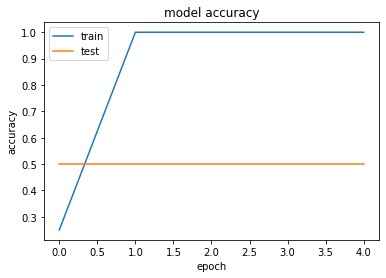

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

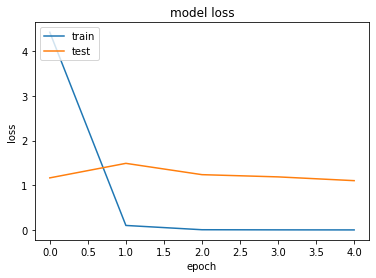

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ***Test the model***

---

---





In [14]:
img_path = '/content/drive/MyDrive/dog.jpg'
label = ['Cat','Dog']
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])

Predicted Array: [[0 1]]
Predicted Label: Dog


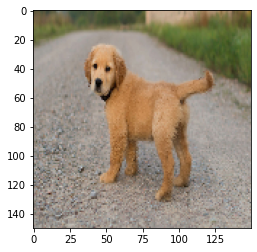

In [15]:
imgplot = plt.imshow(img)
plt.show()

# ***Saved Model Deployment***

---

---





In [16]:
model = load_model('/content/drive/MyDrive/vgg16-xfer-weights.h5')
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                524352    
                                                                 
 dense_15 (Dense)            (None, 2)                 130       
                                                                 
Total params: 15,239,170
Trainable params: 524,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
img_path = '/content/drive/MyDrive/cat.jpg'
label = ['Cat','Dog']
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])

Predicted Array: [[1 0]]
Predicted Label: Cat


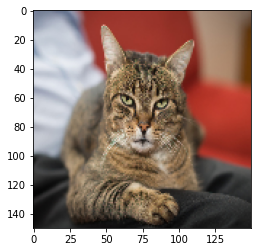

In [18]:
imgplot = plt.imshow(img)
plt.show()

# ***Models for image classification with weights trained on ImageNet***
# ***Xception***
# ***VGG16***
# ***VGG19***
# ***ResNet50***
# ***InceptionV3***
# ***InceptionResNetV2***
# ***MobileNet***
# ***DenseNet***
# ***NASNet ***

---

---



